In [13]:
import Ploty as ploty 
import importlib
importlib.reload(ploty)
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

184.12378054269547

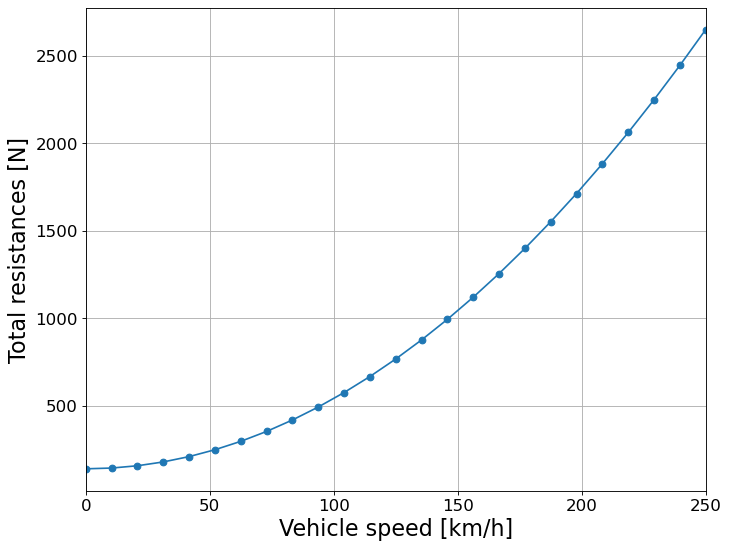

In [14]:
m = 1420   #kg
c = 0.35    #[-]
A = 2.42    #m^2
f = 0.01    #[-]
C = np.pi*(14*25.4 + 2*(60/100)*225)
rd = C/(2*np.pi)/1000

g= 9.81
rho = 1.23


v = np.linspace(0,250/3.6,25)
Ft = m*g*f
Fw = 1/2*rho*A*c*v**2
F_all = Ft + Fw
ploty.plot(v*3.6,F_all,'o')
plt.xlim(0,250)
plt.xlabel('Vehicle speed [km/h]',fontsize = 20)
plt.ylabel('Total resistances [N]',fontsize = 20, color='black')


v_max =  250/3.6   #założenie
F_res = m*g*f + 1/2*rho*A*c*v_max**2
P_res = F_res*v_max
P_res/1000

390.7227975218309

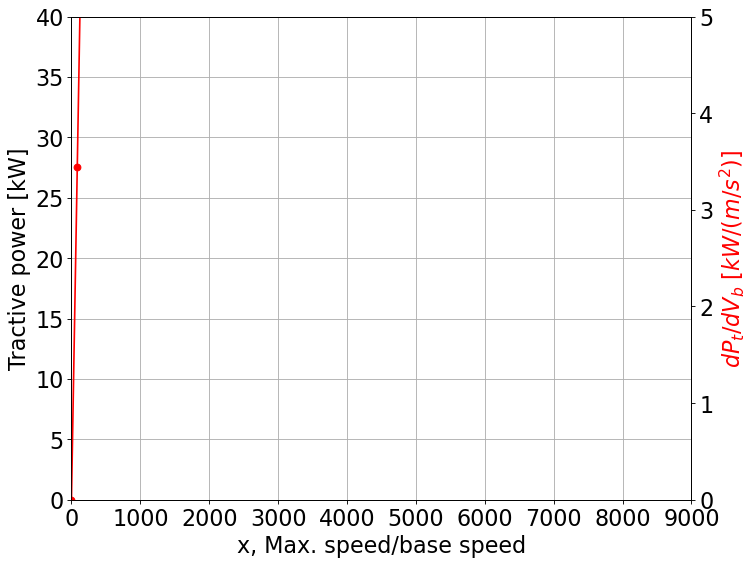

In [5]:
w_max = 9000 * np.pi/30   # RPM ----- > rad/s
w_base = w_max/2

w = np.linspace(0,w_max + 1000 * np.pi/30 , 120)     # 

P_max = P_res
T = []
P = []

count = np.count_nonzero(w<w_base)
for i in range(count):
    T1 = P_max/w_base
    T = np.append(T,T1)

for i in range(count, len(w)):
    T2 = P_max/w[i]
    T = np.append(T,T2)

P = T*w
ploty.plot_double(w*30/np.pi,T, P/1000) 
plt.xlim(0,9000)

np.max(T)

247.43230625583573

''

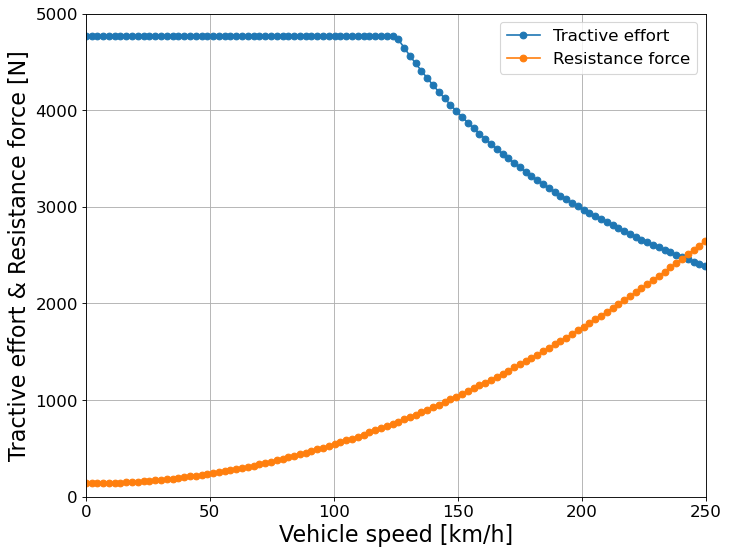

In [6]:
i_max = (w_max*rd)/v_max

v = w*rd/i_max
Ft = T*i_max*0.90/rd 
F1 = m*g*f
F2 = 1/2*rho*A*c*v**2
Fop = F1 + F2

ploty.plot(v*3.6,Ft,'o', label='Tractive effort')
plt.plot(v*3.6,Fop,marker='o',label='Resistance force')
plt.legend(loc='best',fontsize=15)
plt.ylim(0,5000)
plt.xlim(0,250)
plt.xlabel('Vehicle speed [km/h]',fontsize = 20)
plt.ylabel('Tractive effort & Resistance force [N]',fontsize = 20, color='black')

#display(Ft)
#display(Fop)
display(v[-14]*3.6)
;

33.317147183401914

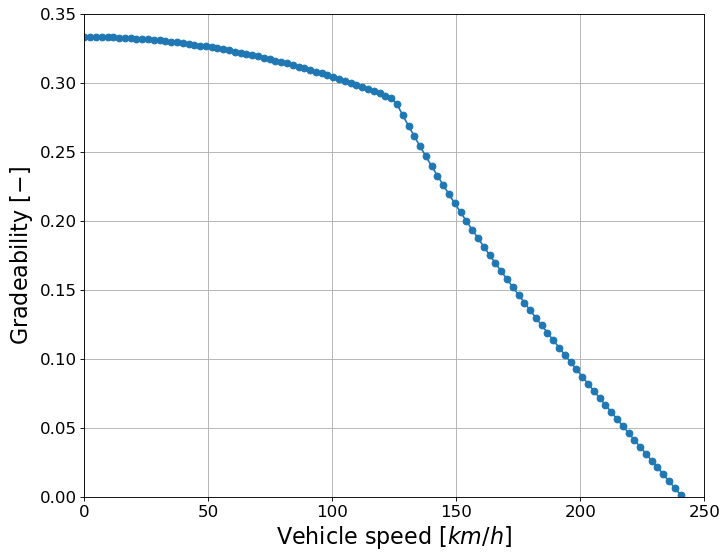

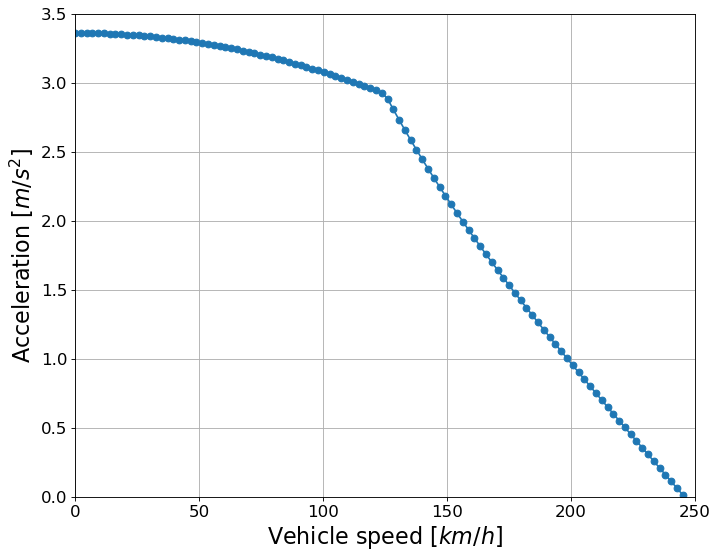

In [7]:
grade = (Ft - Fop)/(m*g)
D = (Ft - F2)/(m*g)
sin_a = (D - f*np.sqrt(1 - D**2 + f**2))/(1+f**2)

ploty.plot(v*3.6, sin_a, 'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Gradeability [$-$]',fontsize = 20)
plt.ylim(0,0.35)
plt.xlim(0,250)
# ------------------------------------ Acceleration
alpha = np.arcsin(sin_a)
cos_a = np.cos(alpha)
F_rd = m*g*(f*cos_a + sin_a)
a = F_rd/m
ploty.plot(v*3.6,a,'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Acceleration [$m/s^2$]',fontsize = 20)
plt.ylim(0,3.5)
plt.xlim(0,250)

sin_a[0]*100

"\nploty.plot(v[4::],v[4::]*ta,'o')\nplt.xlabel('Vehicle speed [$km/h$]',fontsize=20)\nplt.ylabel('Distance [$m$]',fontsize = 20)\n\nplt.ylim(0,5000)\nplt.xlim(0,70)\n"

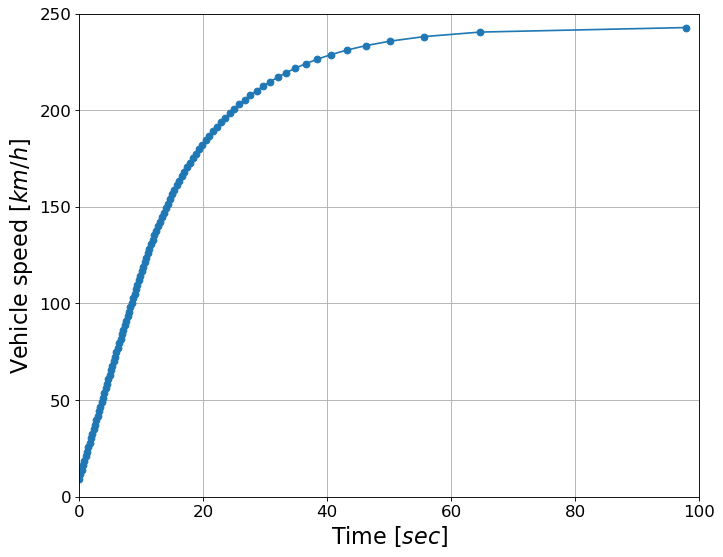

In [8]:
Pt = Ft * v

v1 = v[1:count]
v2 = v[count:-15]

part1 = m*1.1/(Pt[1:count]/v1  - 1/2*rho*c*A*v1**2)
part2 = m*1.1/(Pt[count:-15]/v2 - m*g*f - 1/2*rho*c*A*v2**2)

t1 = integrate.cumtrapz(part1[0:-1]*np.diff(v1),initial=0)
t2 = integrate.cumtrapz(part2[0:-1]*np.diff(v2))

t2 = t2+t1[-1]
ta = np.append(t1,t2)

ploty.plot(ta,(v[4:-15])*3.6,'o')
plt.xlabel('Time [$sec$]',fontsize=20)
plt.ylabel('Vehicle speed [$km/h$]',fontsize = 20)
plt.ylim(0,250)
plt.xlim(0,100)


'''
ploty.plot(v[4::],v[4::]*ta,'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Distance [$m$]',fontsize = 20)

plt.ylim(0,5000)
plt.xlim(0,70)
'''
#display(v[0:-13]*3.6)
#ta


''

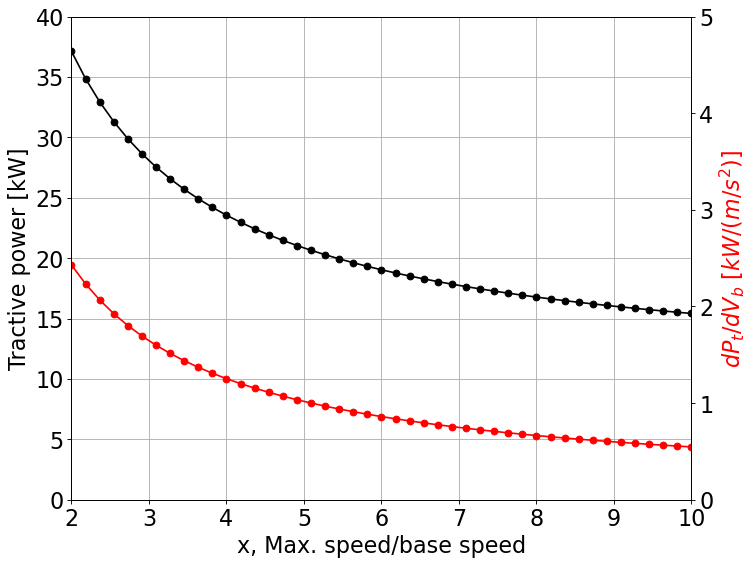

In [9]:
v_final = w_max*rd/i_max
v_base = w_base*rd/i_max
x = np.linspace(2,20,100)

P_t = ( 1.1*m/(2*x)*(v_final**2 + v_base**2) + 2/3*m*g*f*v_final + 1/5*rho*c*A*v_final**3 )/1000


delta_Pt = ( 1.1*m*v_base/x ) /1000

delta_Pt

ploty.plot_double(x, delta_Pt + 10, P_t/1000 ) 
plt.xlim(2,10  )
;